In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


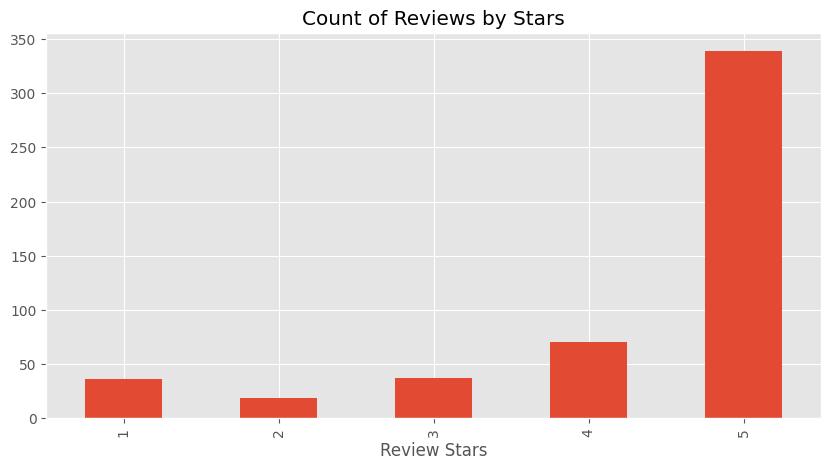

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [17]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [18]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


Step 1. VADER Seniment Scoring¶
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.


In [20]:
import nltk

# Set the NLTK data path
nltk.data.path.append("path_to_nltk_data_directory")

# Download necessary data if not already downloaded
nltk.download('vader_lexicon')

# Import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [23]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [24]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [25]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [26]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [27]:
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


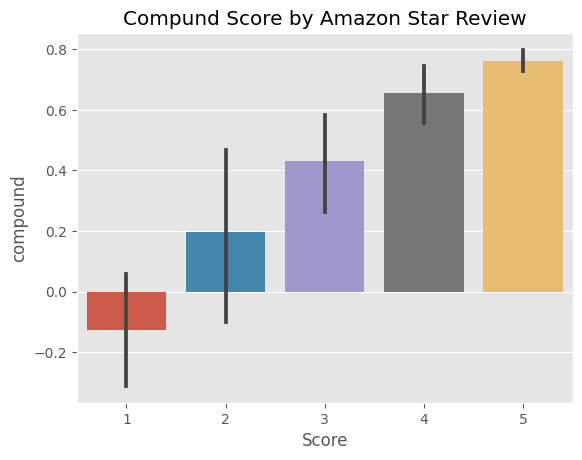

In [28]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

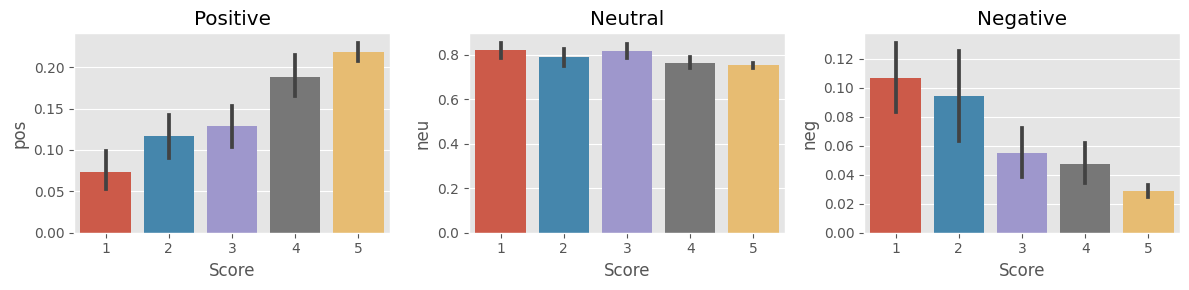

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Step 3. Roberta Pretrained Model
Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [33]:
!pip install transformers
!pip install scipy


     ---------------------------------------- 0.0/138.0 kB ? eta -:--:--
     -------- ------------------------------- 30.7/138.0 kB ? eta -:--:--
     --------------------- --------------- 81.9/138.0 kB 762.6 kB/s eta 0:00:01
     ------------------------ ------------ 92.2/138.0 kB 751.6 kB/s eta 0:00:01
     ----------------------------- ------ 112.6/138.0 kB 726.2 kB/s eta 0:00:01
     ------------------------------------ 138.0/138.0 kB 545.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB 653.6 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.0 MB 657.6 kB/s eta 0:00:14
    --------------------------------------- 0.1/9.0 MB 853.3 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.0 MB 908.0 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.0 MB 778.2 kB/s eta 0:00:12
   - 

In [34]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
!pip install torch torchvision torchaudio


  Using cached torch-2.3.0-cp310-cp310-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.18.0-cp310-cp310-win_amd64.whl.metadata (6.6 kB)
  Using cached torchaudio-2.3.0-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.3.0-cp310-cp310-win_amd64.whl (159.8 MB)
Using cached torchvision-0.18.0-cp310-cp310-win_amd64.whl (1.2 MB)
Using cached torchaudio-2.3.0-cp310-cp310-win_amd64.whl (2.4 MB)
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/228.5 MB 660.6 kB/s eta 0:05:46
   ---------------------------------------- 0.0/228.5 MB 495.5 kB/s eta 0:07:42
   

In [35]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [62]:
!pip install tensorflow


In [41]:
!pip install torch torchvision torchaudio


   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/159.8 MB 364.4 kB/s eta 0:07:19
   ---------------------------------------- 0.1/159.8 MB 364.4 kB/s eta 0:07:19
   ---------------------------------------- 0.1/159.8 MB 364.4 kB/s eta 0:07:19
   ---------------------------------------- 0.2/159.8 MB 452.1 kB/s eta 0:05:53
   ---------------------------------------- 0.2/159.8 MB 502.2 kB/s eta 0:05:18
   ---------------------------------------- 0.3/159.8 MB 578.5 kB/s eta 0:04:36
   --------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    retur

   --------- ------------------------------ 37.0/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.0/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.1/159.8 MB 1.2 MB/s eta 0:01:40
   --------- ------------------------------ 37.2/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.3/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.5/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.6/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.7/159.8 MB 1.2 MB/s eta 0:01:39
   --------- ------------------------------ 37.9/159.8 MB 1.3 MB/s eta 0:01:38
   --------- ------------------------------ 37.9/159.8 MB 1.2 MB/s eta 0:01:38
   --------- ------------------------------ 38.1/159.8 MB 1.3 MB/s eta 0:01:38
   --------- ------------------------------ 38.1/159.8 MB 1.2 MB/s eta 0:01:38
   --------- ------------------------------ 38.1/159

In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [52]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [53]:
results_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Step 4: Review Examples:
Positive 1-Star and Negative 5-Star Reviews


In [79]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [80]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [82]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Step 1: Data Collection
# Assuming you have a CSV file named 'reviews.csv' with columns: Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text
reviews_df = pd.read_csv('reviews.csv')

# Step 2: Data Preprocessing
# Remove punctuation, stopwords, and other noise (you can add more cleaning steps if necessary)

# Step 3: Text Vectorization
# Convert text data into numerical vectors using either Bag-of-Words or TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # You can also use CountVectorizer instead

# Step 4: Model Selection
# Choose a classification algorithm
# Example: Logistic Regression, Naive Bayes, Support Vector Machine, etc.
model = LogisticRegression()  # You can try other models like MultinomialNB(), SVC(), RandomForestClassifier(), etc.

# Step 5: Model Training
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_df['Text'], reviews_df['Score'], test_size=0.2, random_state=42)

# Step 6: Model Training
# Train the model using the training data
pipeline = Pipeline([('vectorizer', vectorizer), ('model', model)])
pipeline.fit(X_train, y_train)

# Step 7: Model Evaluation
# Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score on the testing set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 8: Prediction
# Use the trained model to classify the sentiment of new customer reviews
new_reviews = ["This product is amazing!", "Not satisfied with the quality."]
new_predictions = pipeline.predict(new_reviews)
print("Predictions for new reviews:", new_predictions)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7354056169793564
Precision: 0.6946578300846867
Recall: 0.7354056169793564
F1 Score: 0.7000144186204419
Predictions for new reviews: [5 5]
